# Sarcasm Detection with Bidirectional LSTM

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read 'Data.csv'

In [2]:
df = pd.read_csv("Data.csv")

In [3]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic


### Print some of the Headlines along with the target

In [4]:
for i in range(10):
    print(df["headlines"][i],"--",df["target"][i])
    print()

CNN Triumphs (At Least in Most Demographic Categories) -- Non Sarcastic

‘You Did The Best You Could,’ Says Iron Man Action Figure Voiced By Despondent Toys ‘R’ Us CEO Packing Up Office -- Sarcastic

New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech -- Non Sarcastic

Donald Trump Jr. Gets Slammed Over Racist Birtherism Bot Attack On Kamala Harris -- Non Sarcastic

God Urges Rick Perry Not To Run For President -- Sarcastic

Global Aid Pours into Haiti -- Non Sarcastic

CNN Anchor Calls Obama Protester 'Rude' And 'Crazy' -- Non Sarcastic

Federal Prisons Reinstitute Executions By Lethal Inflation -- Sarcastic

Lou Dobbs Crumbles When Pressed On His 'NAFTA Super Highway' Myth -- Non Sarcastic

CNN Still Bent On Debating 'Two Sides' Of The Confederacy -- Non Sarcastic



### Check Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### View basic statistical information about the dataset

In [6]:
df.describe()

,headlines,target
count,12506,12506
unique,12506,2
top,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
freq,1,6531


### Check for missing values

In [7]:
df.isna().sum()

headlines    0
target       0
dtype: int64

### Check for duplicates

In [8]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

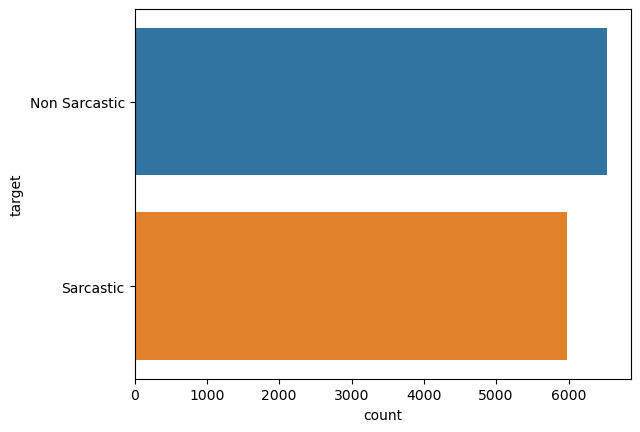

In [9]:
sns.countplot(data = df, y = "target")
plt.show()

### Create a funciton to preprocess the text

In [10]:
def preprocess(sentence):
    sentence = sentence.lower()
    text = re.sub(r"[^a-zA-Z0-9]","",sentence).split()
    lemma = WordNetLemmatizer()
    text =[lemma.lemmatize(i) for i in text]
    return "".join(text)

### Apply the preprocess function to the description

In [12]:
df['headlines'] =df["headlines"].apply(preprocess)

In [13]:
for i in range(10):
    print(df['headlines'][i],'--',df['target'][i])
    print()

cnntriumphsatleastinmostdemographiccategories -- Non Sarcastic

youdidthebestyoucouldsaysironmanactionfigurevoicedbydespondenttoysrusceopackingupoffice -- Sarcastic

newemailsrevealwarmrelationshipbetweenkamalaharrisandbigtech -- Non Sarcastic

donaldtrumpjrgetsslammedoverracistbirtherismbotattackonkamalaharris -- Non Sarcastic

godurgesrickperrynottorunforpresident -- Sarcastic

globalaidpoursintohaiti -- Non Sarcastic

cnnanchorcallsobamaprotesterrudeandcrazy -- Non Sarcastic

federalprisonsreinstituteexecutionsbylethalinflation -- Sarcastic

loudobbscrumbleswhenpressedonhisnaftasuperhighwaymyth -- Non Sarcastic

cnnstillbentondebatingtwosidesoftheconfederacy -- Non Sarcastic



### Split Input & Target Variables

In [14]:
X = df["headlines"]
y = df["target"]

### One Hot encode our Target Variable

In [15]:
y.unique()

array(['Non Sarcastic', 'Sarcastic'], dtype=object)

In [16]:
y = y.map({"Non Sarcastic":0,"Sarcastic":1})

In [17]:
y

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int64

### Split the dataset into Training & Testing Set

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

### Create a keras Tokenizer object

In the Keras library, the Tokenizer is a class that can be used to preprocess text data. It allows you to convert a collection of text documents into a numerical representation that can be used as input to a machine learning model.

In [20]:
tokenizer = Tokenizer(num_words = 5000)

### fit on text for our X

In [22]:
tokenizer.fit_on_texts(X)

In [23]:
vocab_size = len(tokenizer.word_index)+1

### Create a function to convert text to numerical representation and add padding

In [25]:
def text_encoding(txt):
    # texts_to_sequences Transforms each text in texts to a sequence of integers.
    encoded_docs = tokenizer.texts_to_sequences(txt)
    
    # pad_sequences is used to ensure that all sequences in a list have the same length.
    padded_sequence = pad_sequences(encoded_docs, maxlen=128)    
       
    return padded_sequence


### Apply the function to our X_train & X_test

In [26]:
X_train = text_encoding(X_train)
X_test = text_encoding(X_test)

In [28]:
X_train = np.array(X_train,dtype = np.float32)

### Create keras Sequential model with GRU Layers

In [30]:
model = Sequential()

model.add(layers.Embedding(vocab_size, 128))

model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.2))

model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(2, activation = 'sigmoid'))


In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         1600512   
                                                                 
 bidirectional_2 (Bidirecti  (None, None, 256)         263168    
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, None, 256)         0         
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                

### Compile the model

In [32]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics = ['accuracy'])


### Train the model with our Training Set

In [33]:
model.fit(X_train, y_train, epochs = 10, validation_split=0.05)

Epoch 1/10
297/297 [==============================] - 156s 500ms/step - loss: 0.6938 - accuracy: 0.5138 - val_loss: 0.6929 - val_accuracy: 0.5130
Epoch 2/10
297/297 [==============================] - 141s 474ms/step - loss: 0.5874 - accuracy: 0.6479 - val_loss: 0.8370 - val_accuracy: 0.4671
Epoch 3/10
297/297 [==============================] - 152s 511ms/step - loss: 0.4278 - accuracy: 0.7099 - val_loss: 0.7776 - val_accuracy: 0.4451
Epoch 4/10
297/297 [==============================] - 148s 498ms/step - loss: 0.4226 - accuracy: 0.7105 - val_loss: 0.7550 - val_accuracy: 0.4731
Epoch 5/10
297/297 [==============================] - 150s 506ms/step - loss: 0.4217 - accuracy: 0.7063 - val_loss: 0.7429 - val_accuracy: 0.4890
Epoch 6/10
297/297 [==============================] - 152s 512ms/step - loss: 0.4191 - accuracy: 0.7130 - val_loss: 0.7322 - val_accuracy: 0.4711
Epoch 7/10
297/297 [==============================] - 148s 497ms/step - loss: 0.4188 - accuracy: 0.7114 - val_loss: 0.7297 -

### Make predictions with Test set

In [34]:
y_pred=model.predict(X_test)

79/79 [==============================] - 22s 248ms/step


In [35]:
y_pred

array([[0.659966  , 0.37072703],
       [0.55879706, 0.4574847 ],
       [0.53263587, 0.474796  ],
       ...,
       [0.4970041 , 0.50086355],
       [0.53263587, 0.47479603],
       [0.53263587, 0.47479603]], dtype=float32)

In [36]:
y_pred2=[np.argmax(i) for i in y_pred]

### Check accuracy score

In [37]:
from sklearn.metrics import accuracy_score,classification_report,r2_score,confusion_matrix

In [38]:
accuracy_score(y_test,y_pred2)

0.5139888089528377

### Confusion matrix

<Axes: >

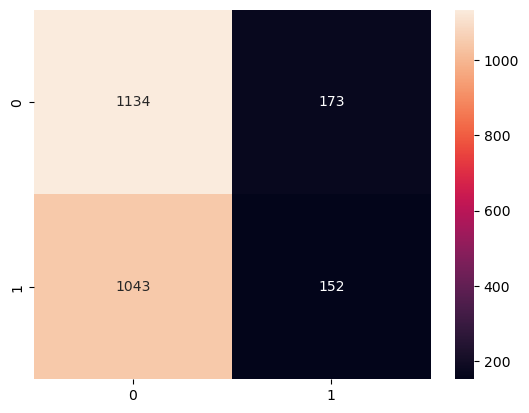

In [39]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='d')

### Classification Report

In [40]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.52      0.87      0.65      1307
           1       0.47      0.13      0.20      1195

    accuracy                           0.51      2502
   macro avg       0.49      0.50      0.43      2502
weighted avg       0.50      0.51      0.44      2502



***